In [ ]:
!pip list |grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list |grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import numpy as np

In [ ]:
X=np.zeros((3,2))

In [ ]:
X.shape

(3, 2)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
X=np.array([[1,2],
            [3,4],
            [5,6]])

In [ ]:
a=np.array([1,2])

In [ ]:
a.shape

(2,)

In [ ]:
a

array([1, 2])

In [ ]:
import matplotlib.pyplot as plt

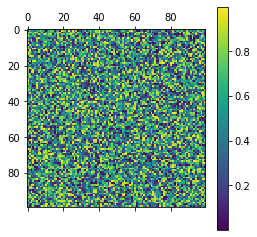

In [ ]:
X=np.random.rand(100,100)
plt.matshow(X)
plt.colorbar()

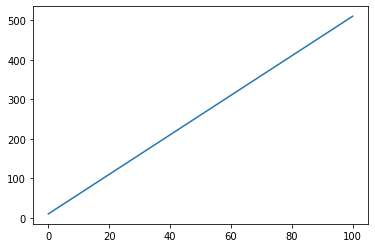

In [ ]:
X=np.linspace(0,100)
y=5*X+10
plt.plot(X,y)

## Basic Regression with Linear Model

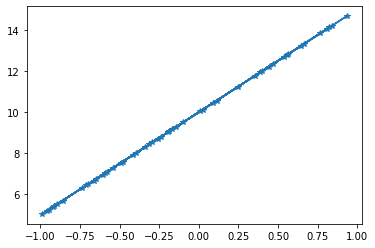

In [ ]:
n=50
d=1
x=np.random.uniform(-1,1,(n,d))
#y=5*x+10
weights_true=np.array([[5],])
(weights_true)
bias_true=np.array([10])
y_true=x*weights_true+bias_true
plt.plot(x,y_true,marker='*')

## Basic Prediction Function:Linear Function

In [ ]:
class Linear:
  def __init__(self,input_dim,hidden_dim=1):
    self.weights=np.random.randn(input_dim,hidden_dim)*np.sqrt(2./input_dim)
    self.bias=np.zeros(hidden_dim)
  def __call__(self,x):
    return x @self.weights + self.bias

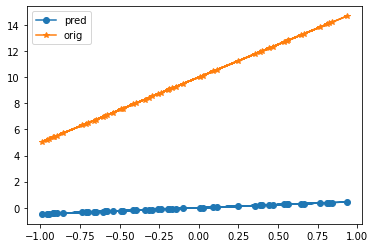

In [ ]:
linear=Linear(d)
ypred=linear(x)
plt.plot(x,ypred,marker='o',label='pred')
plt.plot(x,y_true,marker='*',label='orig')
plt.legend()

## Loss function

In [ ]:
class MSE:
  def __call__(self,y_pred,y_true):
    self.y_pred=y_pred
    self.y_true=y_true
    return ((y_pred-y_true)**2).mean()

In [ ]:
loss=MSE()
loss(ypred,y_true)

95.12149941663023

## BackProbagation

In [ ]:
class MSE:
  def __call__(self,y_pred,y_true):
    self.y_pred=y_pred
    self.y_true=y_true
    return ((y_pred-y_true)**2).mean()

  def backward(self):
    # y=wx+b
    # dy/dx=w
    # dy/db=1
    # dy/dw=x
    n=self.y_true.shape[0]
    self.gradient=2.0*(self.y_pred-self.y_true)/n
    return self.gradient

class Linear:
  def __init__(self,input_dim:int,hidden_dim:int=1):
    self.weights=np.random.randn(input_dim,hidden_dim) *np.sqrt(2.0/input_dim)
    self.bias=np.zeros(hidden_dim)

  def __call__(self,x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self,gradient):
    self.weight_gradient =self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient =gradient @ self.weights.T 
    return self.x_gradient

  def update(self,lr):
    self.weights =self.weights -lr *self.weight_gradient
    self.bias =self.bias -lr *self.bias_gradient



In [ ]:
loss=MSE()
linear =Linear(1)
y_pred =linear(x)
print(loss(y_pred,y_true))
loss_gradient=loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred=linear(x)
print(loss(y_pred,y_true))


94.9500922271577
62.435925278649385


## Train using gradient descent

epoch:0 loss98.60818905166087
epoch:5 loss0.525586018439382
epoch:10 loss0.01099864081969395
epoch:15 loss0.00023016232478907165


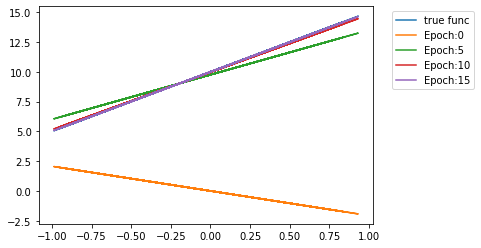

In [ ]:
plt.plot(x,y_true,label='true func')
loss =MSE()
linear=Linear(d)
num_epochs=20
lr=0.5
for epoch in range(num_epochs):
  y_pred=linear(x)
  loss_val=loss(y_pred,y_true)

  if epoch %5 ==0:
    print(f"epoch:{epoch} loss{loss_val}")
    plt.plot(x,y_pred.squeeze(),label=f"Epoch:{epoch}")

  gradient_fromm_loss=loss.backward()
  linear.backward(gradient_fromm_loss)
  linear.update(lr)
plt.legend(bbox_to_anchor=(1.04,1))


### 2-D plot

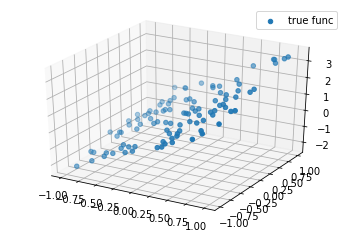

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
n=100
d=2
# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

x=np.random.uniform(-1,1,(n,d))
true_weights = np.array([[2,1],]).T
true_bias = np.array([0.5])
y_true = x @ true_weights+true_bias

def plot3_d(x,y,y_pred=None):
  fig =plt.figure()
  ax =fig.add_subplot(111,projection='3d')
  ax.scatter(x[:,0],x[:,1],y,label='true func')
  if y_pred is not None:
    ax.scatter(x[:,0],x[:,1],y_pred,label='our func')
  plt.legend()

plot3_d(x,y_true)

loss : 0.9495417677562533


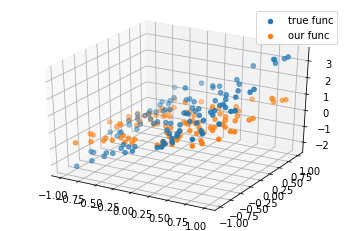

In [ ]:
loss =MSE()
linear = Linear(2)
y_pred=linear(x)
print(f"loss : {loss(y_pred,y_true)}")
fig=plot3_d(x,y_true,y_pred,)

In [ ]:
from typing import Callable

def fit(x:np.ndarray,y:np.ndarray,model:Callable,loss:Callable,lr:float,num_epochs:int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_val = loss(y_pred,y)
    print(f"Epoch :{epoch} loss: {loss_val}")
    gradient_of_the_loss=loss.backward()
    model.backward(gradient_of_the_loss)
    model.update(lr)

Epoch :0 loss: 0.9495417677562533
Epoch :1 loss: 0.7805699109198823
Epoch :2 loss: 0.6521307693912045
Epoch :3 loss: 0.5519685147657747
Epoch :4 loss: 0.47198839779268714
Epoch :5 loss: 0.4067789989734599
Epoch :6 loss: 0.3526675494844617
Epoch :7 loss: 0.30711502071447766
Epoch :8 loss: 0.26832789644590027
Epoch :9 loss: 0.23500823755449254
Epoch :10 loss: 0.20619210197818105
Epoch :11 loss: 0.18114449700375881
Epoch :12 loss: 0.1592905745804194
Epoch :13 loss: 0.14017012520795796
Epoch :14 loss: 0.12340710430556473
Epoch :15 loss: 0.10868890579801532
Epoch :16 loss: 0.09575199770336612
Epoch :17 loss: 0.08437174634323549
Epoch :18 loss: 0.07435502931786696
Epoch :19 loss: 0.06553473167508551
Epoch :20 loss: 0.05776553603448306
Epoch :21 loss: 0.05092062029322185
Epoch :22 loss: 0.04488900700562616
Epoch :23 loss: 0.03957339275475266
Epoch :24 loss: 0.034888340488856084
Epoch :25 loss: 0.030758753504690862
Epoch :26 loss: 0.027118573300484325
Epoch :27 loss: 0.02390965922091708
Epoch 

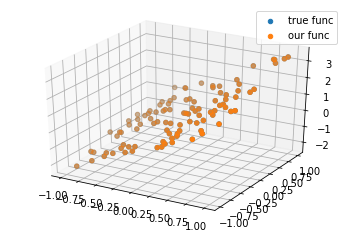

In [ ]:
fit(x,y_true,model=linear,loss=loss,lr=0.1,num_epochs=100)
plot3_d(x,y_true,linear(x))

### Mult layer on non_Linear data

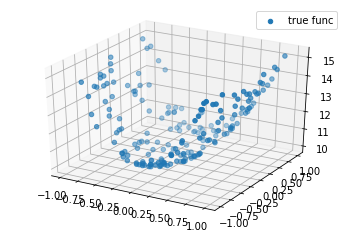

In [ ]:
n=200
d=2
x=np.random.uniform(-1,1,(n,d))
true_weights=np.array([[5,1],]).T
true_bias=np.array([10])
y_true=x**2 @true_weights+true_bias#non linear
plot3_d(x,y_true)

## Add Non Linearity

Epoch :0 loss: 144.06225875146438
Epoch :1 loss: 92.94877319470677
Epoch :2 loss: 60.331633872623115
Epoch :3 loss: 39.50931544994252
Epoch :4 loss: 26.209465226748897
Epoch :5 loss: 17.7082287015993
Epoch :6 loss: 12.268875170999411
Epoch :7 loss: 8.783954354094446
Epoch :8 loss: 6.547189894066255
Epoch :9 loss: 5.108071399317325
Epoch :10 loss: 4.17916150726831
Epoch :11 loss: 3.5770056252761653
Epoch :12 loss: 3.184461566513981
Epoch :13 loss: 2.92668338390321
Epoch :14 loss: 2.755809274582765
Epoch :15 loss: 2.6411981503881474
Epoch :16 loss: 2.5632034792729455
Epoch :17 loss: 2.5092022303148904
Epoch :18 loss: 2.471061589664381
Epoch :19 loss: 2.443522418070131
Epoch :20 loss: 2.4231672970436104
Epoch :21 loss: 2.4077614099483227
Epoch :22 loss: 2.39583125386204
Epoch :23 loss: 2.3863951037167728
Epoch :24 loss: 2.3787903397651444
Epoch :25 loss: 2.3725626331194185
Epoch :26 loss: 2.3673946608233742
Epoch :27 loss: 2.363060104410021
Epoch :28 loss: 2.359393839649699
Epoch :29 loss

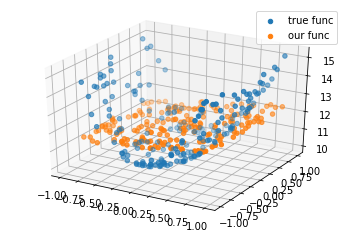

In [ ]:
loss=MSE()
linear=Linear(2)
fit(x,y_true,model=linear,loss=loss,lr=0.1,num_epochs=40)
plot3_d(x,y_true,linear(x))

In [ ]:
class Relu:
  def __call__(self,input_):
    self.input_ = input_
    self.output= np.clip(self.input_, 0,None)
    return self.output

  def backward(self,output_gradient):
    self.input_gradient =(self.input_ >0)*output_gradient
    return self.input_gradient

relu=Relu()
input_=np.expand_dims(np.array([1,0.5,0,-0.5,-1]),-1)
print(relu(input_))
print(relu.backward(input_))



[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


142.83695502305815


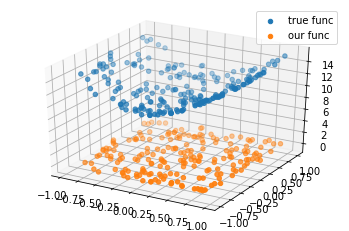

In [ ]:
class Model:
  def __init__(self,input_dim,num_hidden):
    self.linear1=Linear(input_dim,num_hidden)
    self.relu =Relu()
    self.linear2 =Linear(num_hidden,1)

  def __call__(self,x):
    l1=self.linear1(x)
    r=self.relu(l1)
    l2=self.linear2(r)
    return l2

  def backward(self,output_gradient):
    linear2_gradient=self.linear2.backward(output_gradient)
    relu_gradient=self.relu.backward(linear2_gradient)
    linear1_gradient=self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self,lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss=MSE()
model=Model(d,10)
y_pred =model(x)
loss_val=loss(y_pred,y_true)
loss_gradient=loss.backward()
print(loss_val)
model.backward(loss_gradient)
plot3_d(x,y_true,y_pred)





36.3785194735357
Epoch :0 loss: 36.3785194735357
Epoch :1 loss: 33.257343951061785
Epoch :2 loss: 84.78706392455679
Epoch :3 loss: 35.82534125768086
Epoch :4 loss: 8.086265438963022
Epoch :5 loss: 3.8057302711532293
Epoch :6 loss: 1.743917928794055
Epoch :7 loss: 1.0028184999090313
Epoch :8 loss: 0.7992667459960964
Epoch :9 loss: 0.7045676637000564
Epoch :10 loss: 0.6365696706611618
Epoch :11 loss: 0.6202389173852961
Epoch :12 loss: 0.5923550822130061
Epoch :13 loss: 0.6474949303225946
Epoch :14 loss: 0.6476123203677508
Epoch :15 loss: 0.8002606200181439
Epoch :16 loss: 0.8025424450888533
Epoch :17 loss: 1.0916824876869395
Epoch :18 loss: 1.0299871545639114
Epoch :19 loss: 1.4934706311783215
Epoch :20 loss: 1.2453253461379974
Epoch :21 loss: 1.832762367055081
Epoch :22 loss: 1.3666785082016175
Epoch :23 loss: 1.9847988089464974
Epoch :24 loss: 1.3476856444776775
Epoch :25 loss: 1.89851097559211
Epoch :26 loss: 1.22508147104868
Epoch :27 loss: 1.64857476093901
Epoch :28 loss: 1.05839757

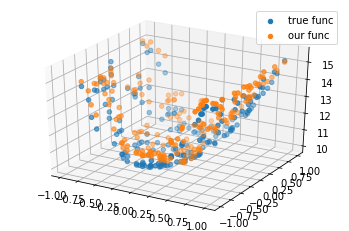

In [ ]:
#one forward and backward step

loss=MSE()
model=Model(d,10)
y_pred =model(x)
loss_val=loss(y_pred,y_true)
loss_gradient=loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred=model(x)
loss_val=loss(y_pred,y_true)
print(loss_val)
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot3_d(x, y_true, model(x))


In [ ]:
import torch
import torch.nn as nn
class TorchModel(nn.Module):
  def __init__(self,input_dim,num_hidden):
    super().__init__()
    self.linear1=nn.Linear(input_dim,num_hidden)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(num_hidden,1)
  def forward(self,x):
    l1=self.linear1(x)
    r=self.relu(l1)
    l2=self.linear2(r)
    return l2
loss=nn.MSELoss()
model=TorchModel(d,10)
x_tensor=torch.tensor(x).float()
y_true_tensor=torch.tensor(y_true).float()
y_pred_tensor=model(x_tensor)
loss_val=loss(y_pred_tensor,y_true_tensor)
print(loss_val)

tensor(137.8000, grad_fn=<MseLossBackward>)


In [ ]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
optimizer.zero_grad()
y_pred_tensor =model(x_tensor)
loss_val=loss(y_pred_tensor,y_true_tensor)
loss_gradient=loss_val.backward()
optimizer.step()


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)